In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from latexify import latexify, format_axes

Heavily borrowed and inspired from https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

In [2]:
latexify()

Text(0, 0.5, '$x_2$')

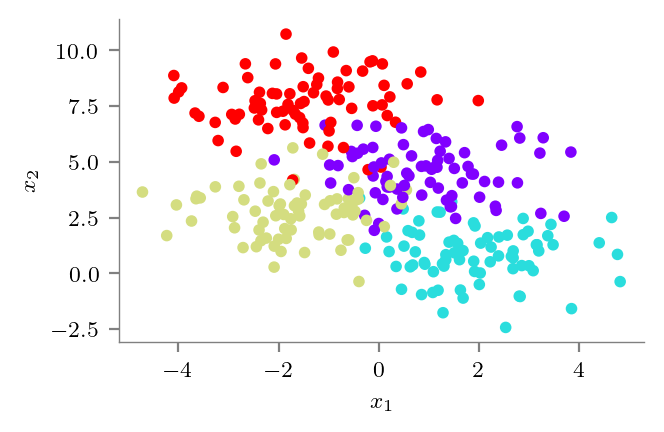

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow')
format_axes(plt.gca())
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
def visualize_tree(depth, X, y, ax=None, cmap='rainbow'):
    model = DecisionTreeClassifier(max_depth=depth)
    ax = ax or plt.gca()
    print(model, depth)
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    format_axes(plt.gca())
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.2,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    plt.savefig(f"../figures/decision-trees/dt-{depth}.pdf")
    plt.clf()

In [14]:
for depth in range(1, 11):
    visualize_tree(depth, X, y)

DecisionTreeClassifier(max_depth=1) 1
DecisionTreeClassifier(max_depth=2) 2


/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,
/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


DecisionTreeClassifier(max_depth=3) 3
DecisionTreeClassifier(max_depth=4) 4


/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,
/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


DecisionTreeClassifier(max_depth=5) 5
DecisionTreeClassifier(max_depth=6) 6


/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,
/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


DecisionTreeClassifier(max_depth=7) 7
DecisionTreeClassifier(max_depth=8) 8


/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,
/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


DecisionTreeClassifier(max_depth=9) 9
DecisionTreeClassifier(max_depth=10) 10


/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,
/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_34403/3322787221.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.2,


<Figure size 339x209.514 with 0 Axes>